# Лабораторна робота №6. Кластеризацій. Аналіз даних.

У цій лабораторній завданням буде розділити вина по сегментах користувачів.
__Важливо відмітити, що у датасеті, який буде використовуватись є відмітки, до якого сегменту відноситься вино, але вони не будуть використовуватись.__

#### Імпортуйте бібліотеки pandas, matplotlib та класс KMeans з бібліотеки sklearn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Зчитайте дані з файлу `wine.csv` у датафрейм `wine`

In [3]:
# ваш код тут
df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


#### Побудуйте точоковий графік з отриманого датафрейму, де по осі `x` розташовані значення `Alcohol`, а по осі `y` значення `Proline`.

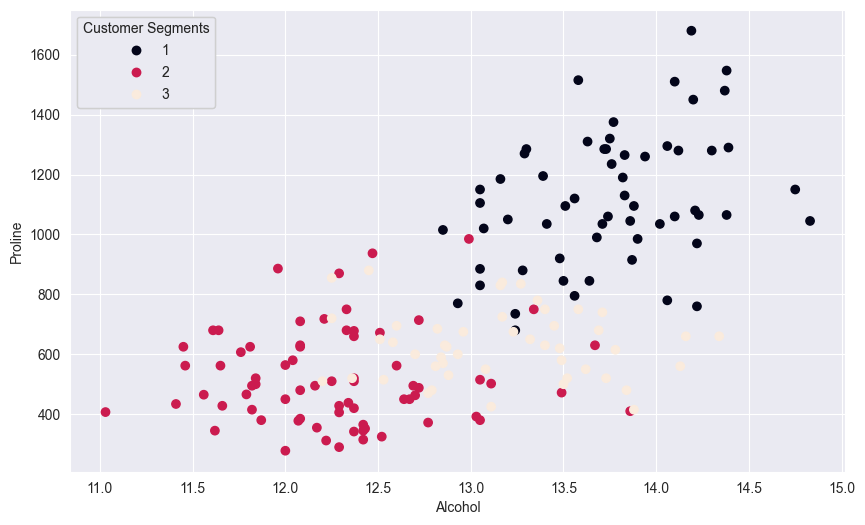

In [4]:
# ваш код тут
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Alcohol'], df['Proline'], c=df['Customer_Segment'])
legend = plt.legend(*scatter.legend_elements(),title="Customer Segments")
plt.gca().add_artist(legend)
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.grid(True)
plt.show()

#### Побудуйте точоковий графік з отриманого датафрейму, де по осі `x` розташовані значення `Proline` а по осі `y` значення `OD280`.

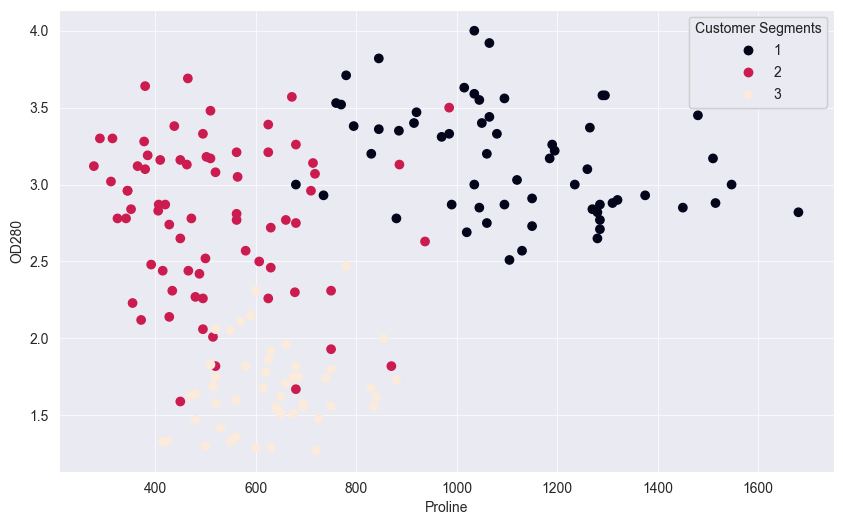

In [5]:
# ваш код тут
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Proline'], df['OD280'], c=df['Customer_Segment'])
legend = plt.legend(*scatter.legend_elements(),title="Customer Segments")
plt.gca().add_artist(legend)
plt.xlabel('Proline')
plt.ylabel('OD280')
plt.grid(True, alpha=0.7)
plt.show()

## K-Means.

#### Імпортуйте клас KMeans з бібілотеки sklearn.

In [6]:
from sklearn.cluster import KMeans

#### Створіть об'єкт класу KMeans з трьома кластерами. У конструктор передайте параметр  random_state=32, щоб мати однакові параметри ініціалізації центроїдів з прикладами.


In [7]:
# ваш код тут
kmeans = KMeans(n_clusters = 3, random_state = 32)
kmeans

KMeans(n_clusters=3, random_state=32)

#### Натренуйте модель на даних з датафрейму. Виведіть значення поля labels_ з отриманого результату.

In [34]:
# ваш код тут

import numpy as np
df_test = df.drop(columns=['Customer_Segment'])
kmeans.fit(df_test)
kmeans.labels_

/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

#### Виведіть отримані центри кластерів.

In [36]:
# ваш код тут
kmeans.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Proline_ а по осі _y_ значення _OD280_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

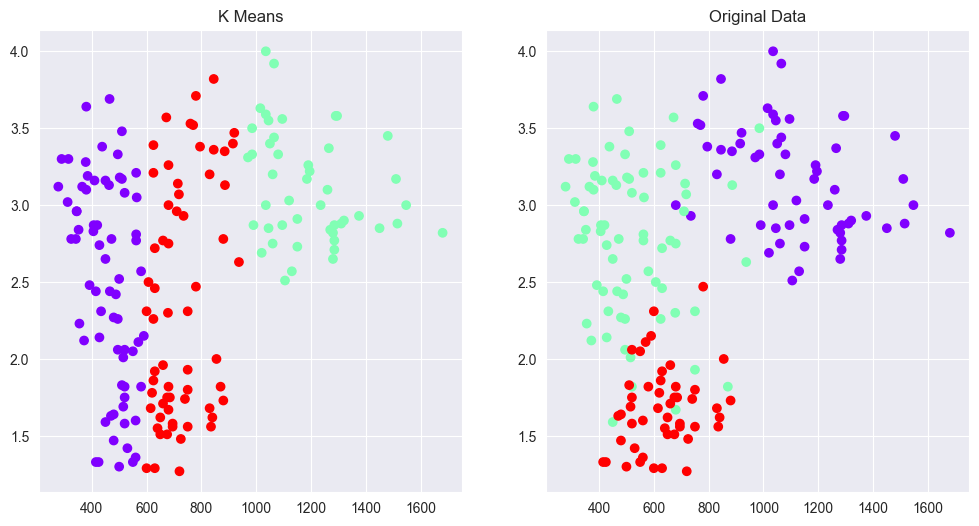

In [37]:
# ваш код тут
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('K Means')
ax1.scatter(df['Proline'], df['OD280'], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original Data')
ax2.scatter(df['Proline'], df['OD280'], c=df['Customer_Segment'], cmap='rainbow')

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Alcohol_ а по осі _y_ значення _Proline_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

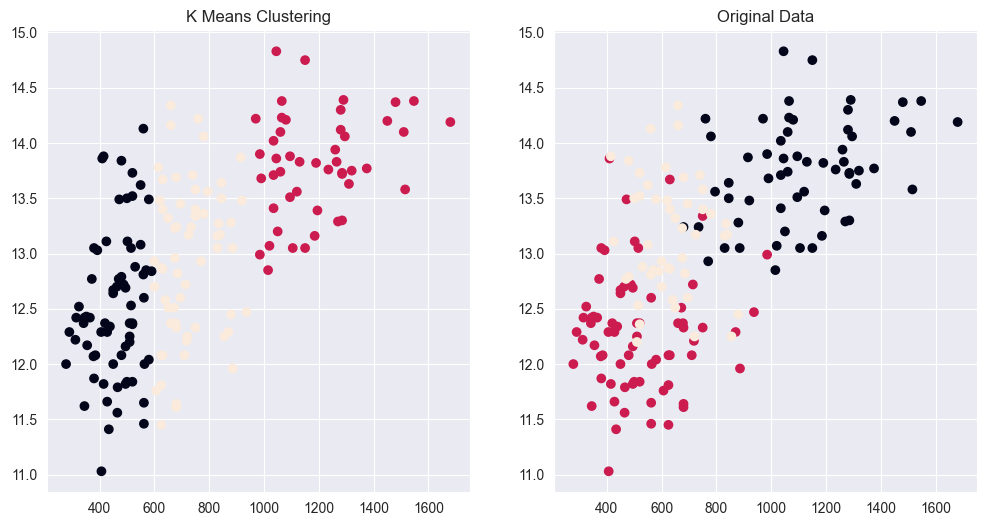

In [11]:
# ваш код тут
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('K Means Clustering')
ax1.scatter(df['Proline'], df['Alcohol'], c=kmeans.labels_)
ax2.set_title('Original Data')
ax2.scatter(df['Proline'], df['Alcohol'], c=df['Customer_Segment'])

# Агломеративна кластеризація.

#### Імпортуйте клас AgglomerativeClustering з бібілотеки sklearn.

In [12]:
from sklearn.cluster import AgglomerativeClustering

#### Створіть об'єкт класу AgglomerativeClustering з трьома кластерами. 

In [13]:
# ваш код тут
hc = AgglomerativeClustering(n_clusters = 3)

#### Натренуйте кластеризатор даними з датафрейму з винами.

In [14]:
# ваш код тут
result = hc.fit_predict(df_test)
result

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Proline_ а по осі _y_ значення _OD280_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

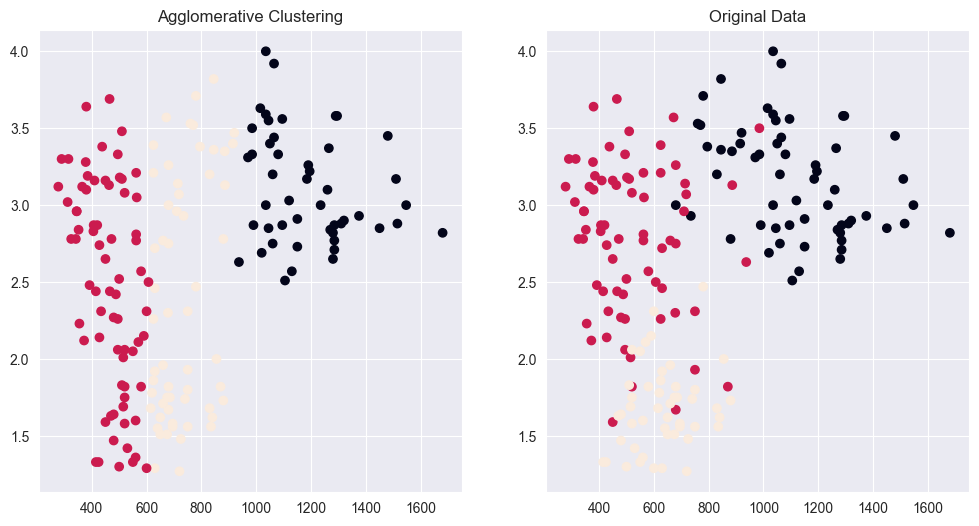

In [15]:
# ваш код тут
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Agglomerative Clustering')
ax1.scatter(df['Proline'], df['OD280'], c=result)
ax2.set_title('Original Data')
ax2.scatter(df['Proline'], df['OD280'], c=df['Customer_Segment'])


#### Побудуйте точкові графіки порівняння кластерів, отриманих з використанням K-Means та справжніх результатів. По осі _x_ задайте значення  _Alcohol_ а по осі _y_ значення _Proline_. Для розподілу по кластерах використайте параметр __c=__ з функції _scatter_.

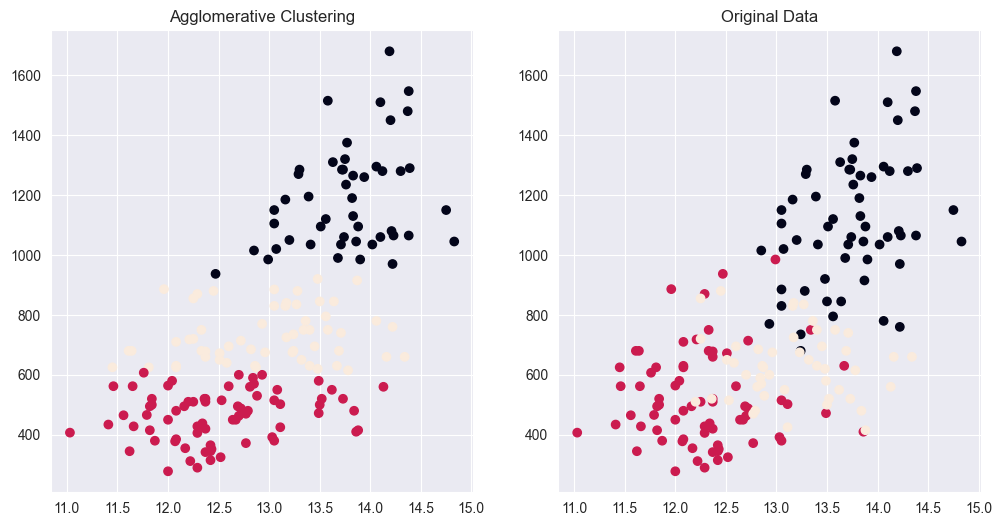

In [16]:
# ваш код тут
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_title('Agglomerative Clustering')
ax1.scatter(df['Alcohol'], df['Proline'], c=result)
ax2.set_title('Original Data')
ax2.scatter(df['Alcohol'], df['Proline'], c=df['Customer_Segment'])

### Дендрограми.

#### Імпортуйте клас `hierarchy` для побудови дендрограм.

In [17]:
from scipy.cluster import hierarchy

#### Побудуйте дендрограму для даних про вина.

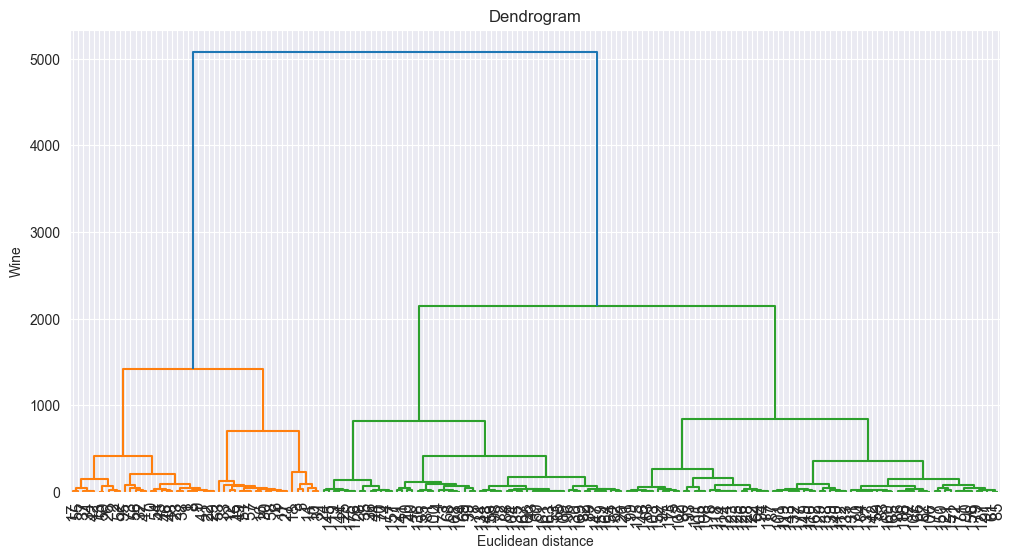

In [18]:
# ваш код тут

Z = hierarchy.linkage(df, method='ward')

plt.figure(figsize=(12, 6))
plt.title('Dendrogram')
plt.xlabel('Euclidean distance')
plt.ylabel('Wine')
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.show()


# DBSCAN

Дані для цієї частини лабораторної:

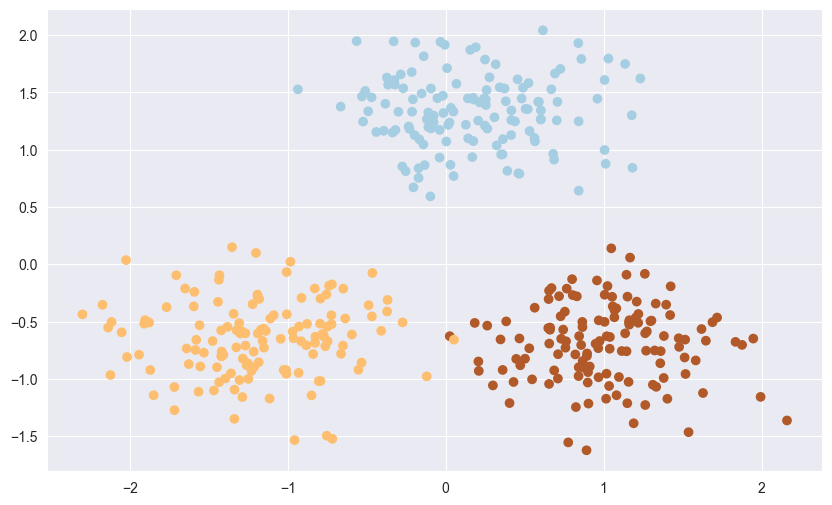

In [19]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#Determine centroids
centers = [[0.5, 2], [-1, -1], [1.5, -1]]
#Create dataset
X, y = make_blobs(n_samples = 400, centers = centers, 
                  cluster_std = 0.5, random_state = 0)
#Normalize the values
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'Paired')

#### Імпортуйте клас DBSCAN.

In [20]:
from sklearn.cluster import DBSCAN

#### Створіть об'єкт класу DBSCAN з параметрами __eps = 0.4__, __min_samples = 20__.

In [21]:
# ваш код тут

result = DBSCAN(eps = 0.4, min_samples = 20)
result


DBSCAN(eps=0.4, min_samples=20)

#### Натренуйте створений об'єкт на датафреймі Х.

In [22]:
# ваш код тут
result.fit_predict(X)

array([ 0,  0,  1,  2,  2,  1,  1,  2,  0,  1,  0,  0,  2,  1,  0,  1,  1,
        2,  2,  2,  2,  0,  0,  0,  0,  2,  1,  2,  1, -1,  0,  1,  0,  0,
        0,  0,  0,  0,  1,  2,  2,  0,  2,  1,  0,  2,  2,  2,  0,  1, -1,
        2,  2,  1,  0,  1,  2,  2, -1,  2,  2,  1,  1,  2,  2,  1,  0,  1,
        2,  0,  1,  1,  2,  1,  0,  1,  2,  1,  0,  0,  2,  2,  1,  0,  2,
        1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  2,  0,
        2,  1,  1,  2,  1,  2,  2,  0,  1,  1,  0,  1,  0,  0,  2,  0,  0,
        2,  0,  1,  2,  2,  1,  0,  1,  2,  0,  1,  1,  2,  1,  2,  1,  0,
        0,  2,  0,  0,  2,  1,  1,  1,  2, -1,  0,  0,  1,  0,  1,  1,  1,
        0,  0,  1,  1, -1,  2,  1,  2,  0,  2,  1,  0,  0,  1, -1, -1,  2,
        1,  2,  2,  0,  1,  0,  0,  1,  2,  2,  1,  2,  1,  0,  2,  1,  0,
        2,  0,  2,  2,  1,  1,  0,  2,  2,  1,  2,  0,  1,  2,  0, -1,  1,
        1,  2,  1,  2,  1, -1,  2,  0,  2,  0,  2,  1,  0,  2,  0, -1,  0,
       -1,  2,  0,  2,  1

#### Побудуйте графік з розподілом точок по кластерах.

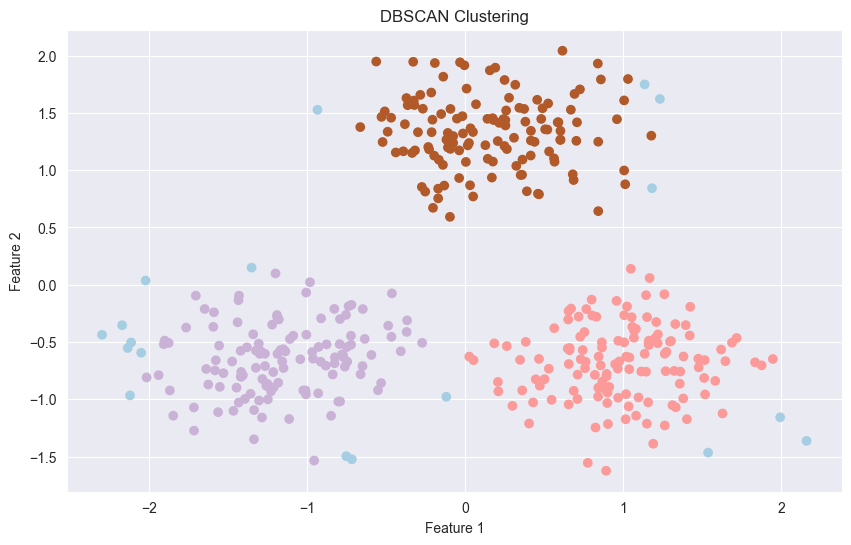

In [23]:
# ваш код тут

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c = result.labels_, cmap = 'Paired')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# PCA.
#### Для цієї частини лабораторної використайте датафрейм `wine`. Промасштабуйте дані з допомогою класу `StandardScaler` з пакету _sklearn_. Для цього використайте методи __fit()__ та __transform()__.

In [24]:
# ваш код тут
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Customer_Segment', axis=1))
scaled_df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### Створіть об'єкт класу `PCA`, який розкладе матрицю ознак по двох основних компонентах.

In [25]:
# ваш код тут
pca = PCA(n_components=2)
pca

PCA(n_components=2)

#### Натренуйте модель PCA на промасштабованих даних. Використайте методи __fit()__ та __transform()__.

In [26]:
# ваш код тут
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)
pca_df

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240111],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

#### Побудуйте графік розподілу точок по двох основних компонентах. Задайте параметр __c = wine['Customer_Segment']__.

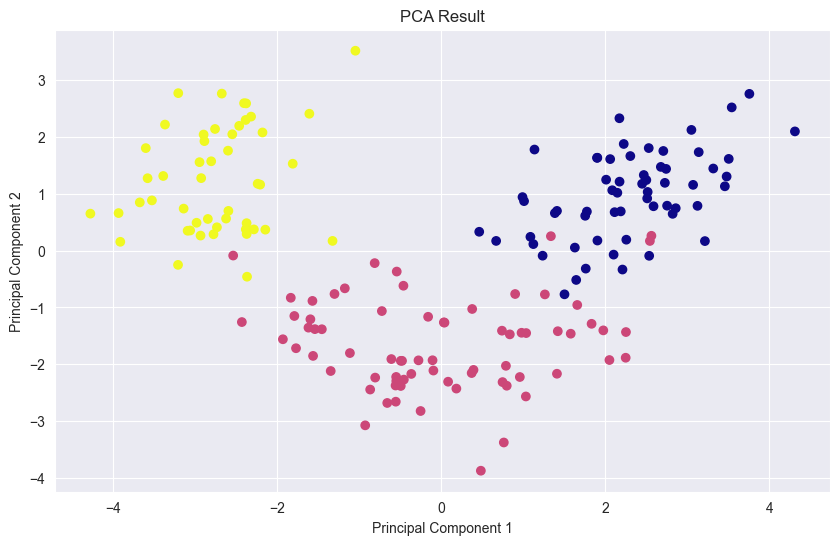

In [27]:
# ваш код тут
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=df['Customer_Segment'], cmap = 'plasma')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# SVD.
#### Для цієї частини лабораторної використайте датафрейм `wine`. Промасштабуйте дані з допомогою класу `StandardScaler` з пакету `sklearn`. Для цього використайте методи __fit()__ та __transform()__.

In [28]:
# ваш код тут
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Customer_Segment', axis=1))
scaled_df


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

#### Створіть об'єкт класу `TruncatedSVD`, який розкладе матрицю ознак по двох основних компонентах.

In [29]:
# ваш код тут
svd = TruncatedSVD(n_components=2)
svd

TruncatedSVD()

#### Натренуйте модель TruncatedSVD на промасштабованих даних. Використайте методи __fit()__ та __transform()__.

In [30]:
# ваш код тут
svd.fit(scaled_df)
svd_df = svd.transform(scaled_df)
svd_df

/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/andriytok/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = no

array([[ 3.31675081,  1.44346263],
       [ 2.20946492, -0.33339289],
       [ 2.51674015,  1.0311513 ],
       [ 3.75706561,  2.75637191],
       [ 1.00890849,  0.86983082],
       [ 3.05025392,  2.12240112],
       [ 2.44908967,  1.17485013],
       [ 2.05943687,  1.60896307],
       [ 2.5108743 ,  0.91807096],
       [ 2.75362819,  0.78943767],
       [ 3.47973668,  1.30233324],
       [ 1.7547529 ,  0.61197723],
       [ 2.11346234,  0.67570634],
       [ 3.45815682,  1.13062988],
       [ 4.31278391,  2.09597558],
       [ 2.3051882 ,  1.66255173],
       [ 2.17195527,  2.32730534],
       [ 1.89897118,  1.63136888],
       [ 3.54198508,  2.51834367],
       [ 2.0845222 ,  1.06113799],
       [ 3.12440254,  0.78689711],
       [ 1.08657007,  0.24174355],
       [ 2.53522408, -0.09184062],
       [ 1.64498834, -0.51627893],
       [ 1.76157587, -0.31714893],
       [ 0.9900791 ,  0.94066734],
       [ 1.77527763,  0.68617513],
       [ 1.23542396, -0.08980704],
       [ 2.18840633,

#### Побудуйте графік розподілу точок отриманих після декомпозиції. Задайте параметр __c = wine['Customer_Segment']__.

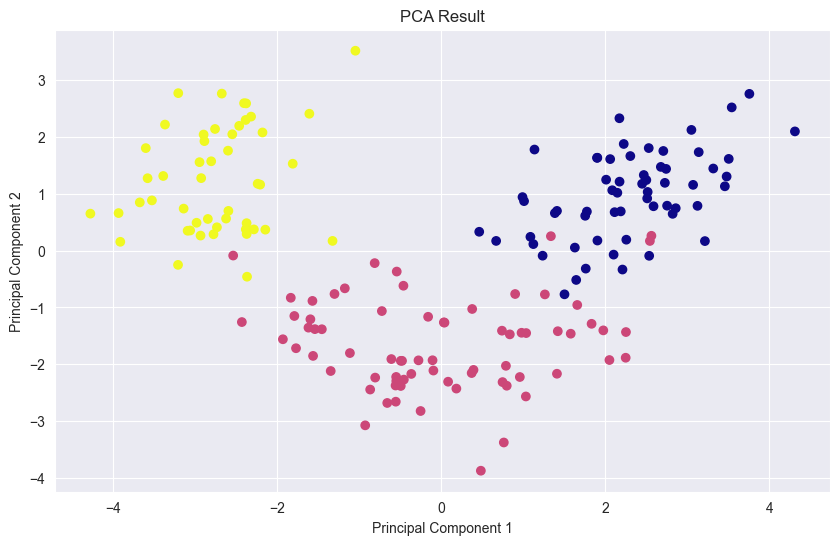

In [31]:
# ваш код тут
plt.figure(figsize=(10, 6))
plt.scatter(svd_df[:, 0], svd_df[:, 1], c=df['Customer_Segment'], cmap = 'plasma')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()